This notebook shows how the optimizatoin landscape looks like for quadratic functions.

In [3]:
%pylab inline

import seaborn as sns
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


Let $x\in\mathbb{R}^n$, $H\in\mathbb{R}^{n\times n}$ and symmetric, and $G\in \mathbb{R}^n$.

Consider $f(x)=\frac{1}{2}x^T H x + G^T x$.

Examples:
1. If $n=1$, then  $f(x) = x_1^2 H_{11}/2 + x_1 G_{1}$.
2. If $n=2$, then $f(x) = x_1^2H_{11}/2 + x_1x_2(H_{12}+H_{21}) /2+ x_2^2H_{22}/2 + x_1G_1 + x_2G_2 = x_1^2H_{11}/2 + x_1x_2H_{12} + x_2^2H_{22}/2 + x_1G_1 + x_2G_2$

Easy exercise: suppse $H$ is not symmetric.

Then $H = H+H^T/2 - H^T/2 = (H+H^T)/2 + (H-H^T)/2$.

Thus $x^THx = x^T\frac{H+H^T}{2}x + x^T\frac{H- H^T}{2}x$.

It is easy to show (exercise) that $ x^T\frac{H- H^T}{2}x = 0$. Thus when $H$ is not symmetric, we can replace it in the quadratic form by the its symmetrization $\frac{H+ H^T}{2}$.



In [0]:
def plot_quadratic(H, G=None, xlim=(-10, 10), ylim=(-10, 10), npts=50):
    x1, x2 = meshgrid(linspace(xlim[0], xlim[1], npts), linspace(ylim[0], ylim[1], npts))

    X = stack([x1, x2], axis=-1).reshape(npts, npts, 2, 1)
    # this uses broadcasting over a stack of matrices to compute all the points at once,
    # see: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.matmul.html
    V = matmul(matmul(X.transpose([0,1,3,2]), H), X) / 2.0
    if G is not None:
        V += matmul(G.T, X)
    V = V.reshape(npts, npts)
    contourf(x1, x2, V, cmap='jet')
    axis('equal')
    colorbar()
    xlabel('x1')
    ylabel('x2')

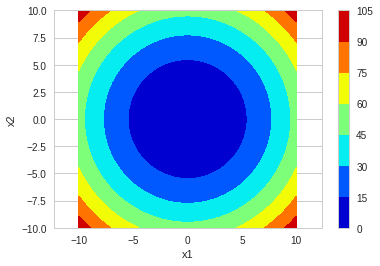

In [5]:
# this is just x_1^2 + x_2^2
H = np.array(
    [[1.0, 0.0],
     [0.0, 1.0]]
)

plot_quadratic(H)

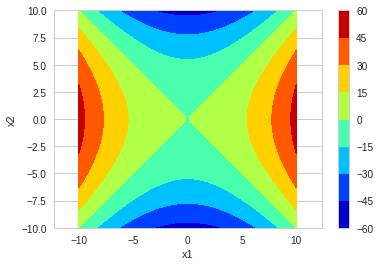

In [89]:
# this is just x_1^2 - x_2^2
# it has a saddle-point at (0, 0)
H = np.array(
    [[1.0, 0.0],
     [0.0, -1.0]]
)


plot_quadratic(H)

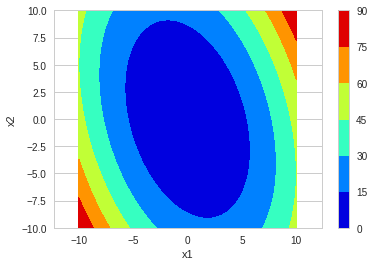

In [6]:
# this looks like an ellipsis
H = np.array(
    [[1.0, 0.2],
     [0.2, 0.4]]
)

plot_quadratic(H)

Using the Eigenvector decompositoin, we can find a basis aligned with the axis of the ellipsis:

First find the eigendecomposition $H = Q \Lambda Q^T$.

Then transform $x' = Q^Tx$.

Now notice that $x^T H x = x^T (Q\Lambda Q^T) x = x'^T \Lambda x' = \sum_i x_i'^2 \Lambda_{ii}$ since $\Lambda$ is diagonal.




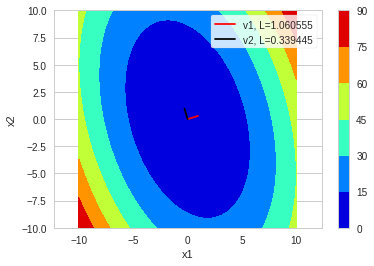

In [7]:
L, Q = eig(H)
plot_quadratic(H)
plot([0, Q[0,0]], [0, Q[1,0]], color='r', label='v1, L=%f' % L[0])
plot([0, Q[0,1]], [0, Q[1,1]], color='k', label='v2, L=%f' % L[1])
legend(frameon=True)

The gradient can be decomposed into its components in the new basis. We want to make small steps along the direction $Q_{:1}$ which corresponds to the largest eigenvalue and large steps along the second axis ($Q_{:2}$). However, gradient descent uses only one learning rate. Thus we will either:
- take steps so large that we will oscillate along $Q_{:1}$
- take steps small enough to not oscillate along $Q_{:1}$, but make small progress along $Q_{:2}$

The largest the discrepancy of $\Lambda_1$ to $\Lambda_2$, the worse. The ration of the largest eigenvalue to the smallest one is called the *condition number* and the largest the condition number, the worse plain gradient descent will work.

The gradient of the quadratic function with respect to $x$ is:

\begin{equation}
\frac{\partial \frac{1}{2} x^T H x + G^t x}{\partial x} = H x + G^T
\end{equation}

Moreover, the Hessian (the matrix of second derivatives) is just $H$. 

The Newton method rotates the gradient by $H^{-1}$. This can be seen as:
1. rotating the gradient into the coordinates given by the eigenvectors,
2. dividing the gradient along both axis by the eigenvalues (thus equalizing the rate of descent along both axis),
3. rotating the equalized gradient back into the original coordinates.

In the cell below notice how the newton method reaches the optimum point in just one step!

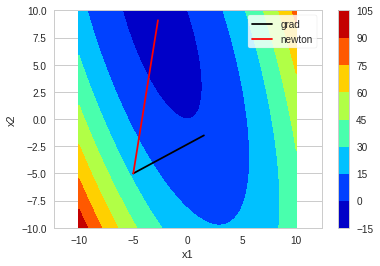

In [8]:
H = np.array(
    [[1.0, 0.3],
     [0.3, 0.2]]
)
G = np.array(
    [[0.0],
     [-1.0]]
)
plot_quadratic(H, G)

# place where we evaluate the gradient
x0 = np.array(
    [[-5.0],
     [-5.0]]
)


dfdx0 = matmul(H, x0) + G

plot([x0[0], x0[0] - dfdx0[0]],
     [x0[1], x0[1] - dfdx0[1]], 'k', label='grad')

newton_step = matmul(inv(H), dfdx0)

plot([x0[0], x0[0] - newton_step[0]],
     [x0[1], x0[1] - newton_step[1]], 'r', label='newton')


legend(frameon=True)
